In [1]:
import io
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import axes3d, Axes3D

import glob

In [31]:
rope_type = 'red'
pcds = np.load(f'/root/real2sim/real2sim/real_points/{rope_type}/real_pcds.npy', allow_pickle=True)
with open('/root/ExPCP/policy/pbm/experts/Move_500_10500_0.2_0.4_200_200/Move-v1/expert_0.0000_18:52:29.pickle', 'rb') as f:
    data = pickle.load(f)
    pcds_sim = data['plasticine_pc']
    print(data['E'])

#/root/ExPCP/policy/pbm/output/Move_500_10500_0.2_0.4_200_200/Move-v1/2023-05-20 18:52:20.394953

1625.3548828874316


In [3]:
modify_pcds_list = []
for pcd in pcds:
    if pcd.shape[0] < 1000:
        modify_pcds_list.append(pcd)
        bf_pcd = pcd
    else:
        modify_pcds_list.append(bf_pcd)
pcds = modify_pcds_list

In [48]:
# rope用

/tmp/ipykernel_2232/57514085.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/tmp/ipykernel_2232/57514085.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_pcds = np.array(output_pcds)


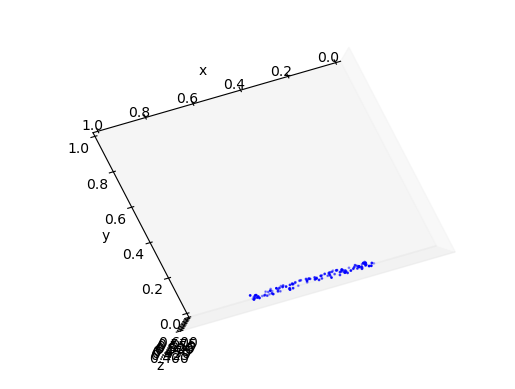

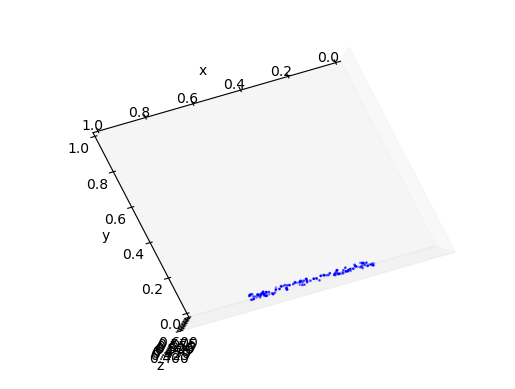

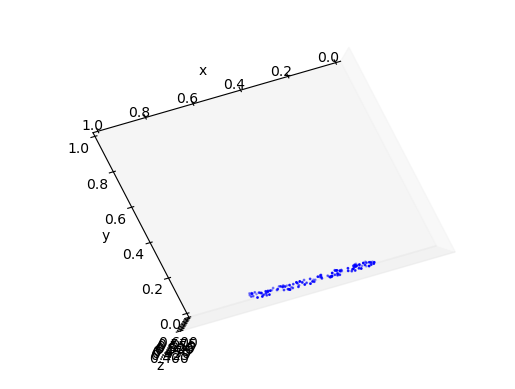

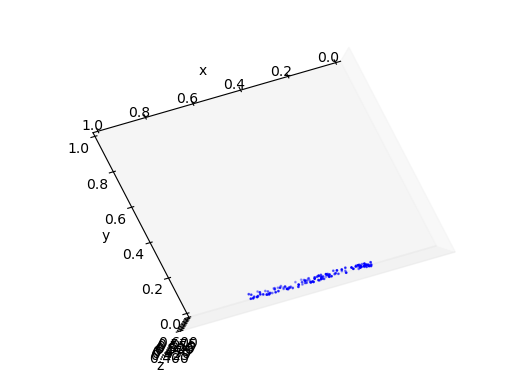

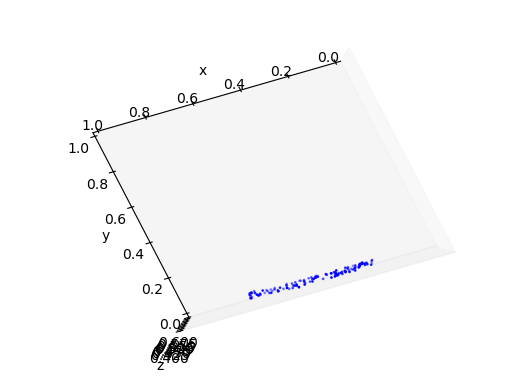

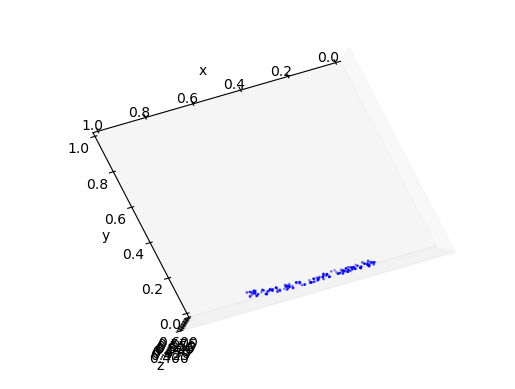

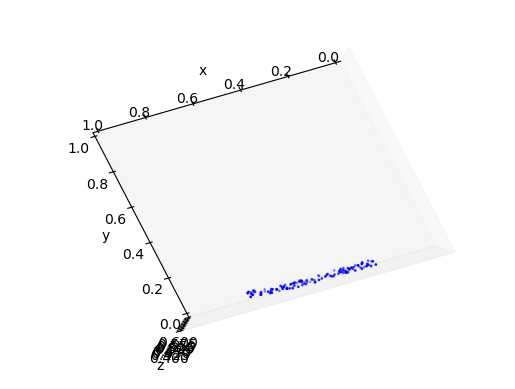

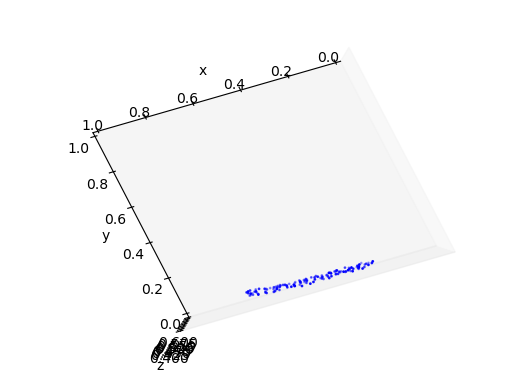

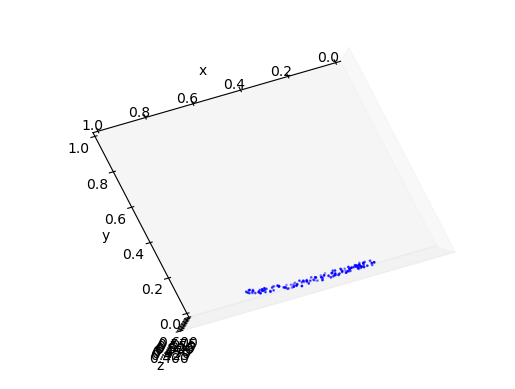

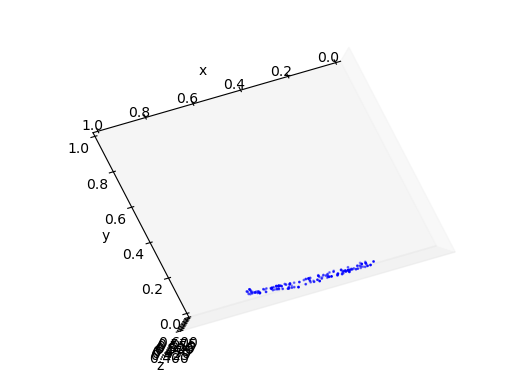

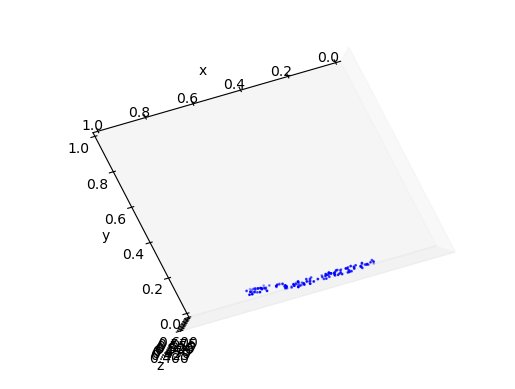

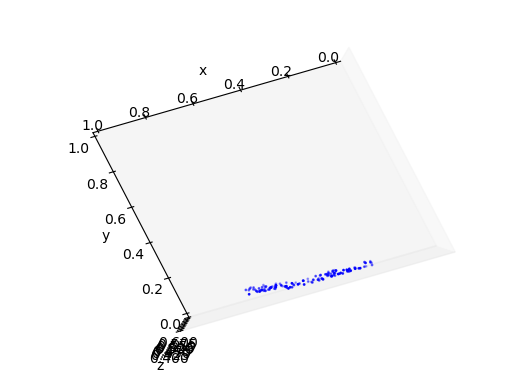

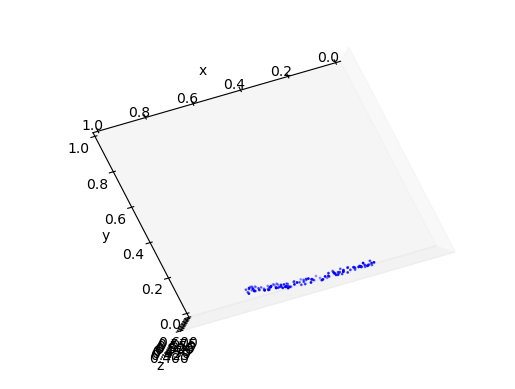

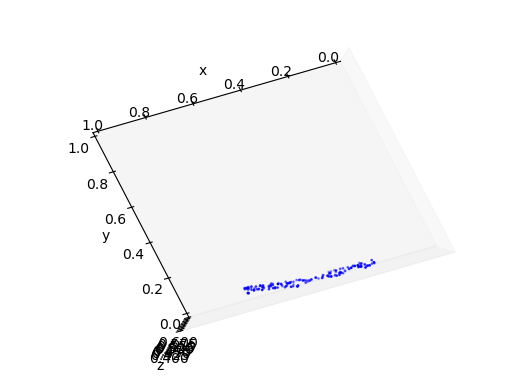

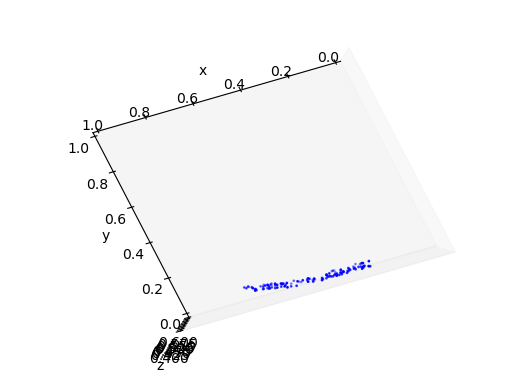

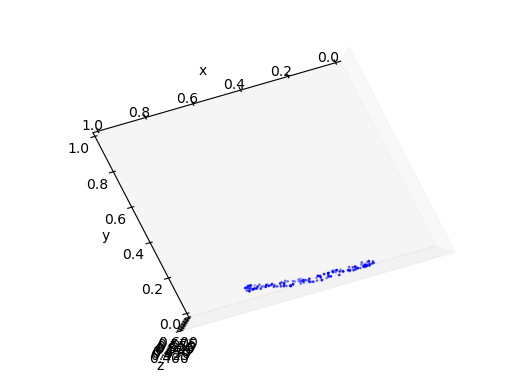

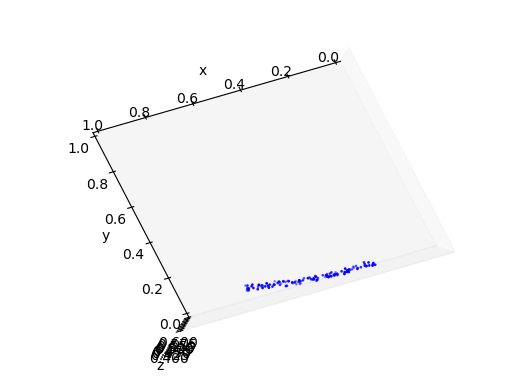

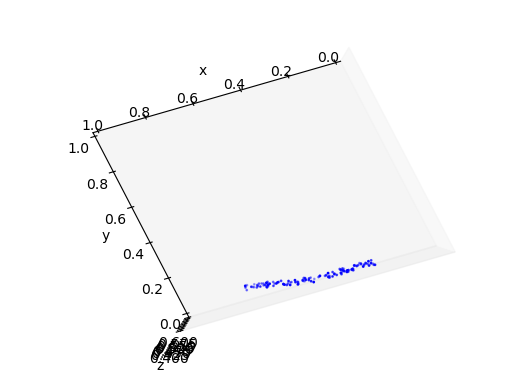

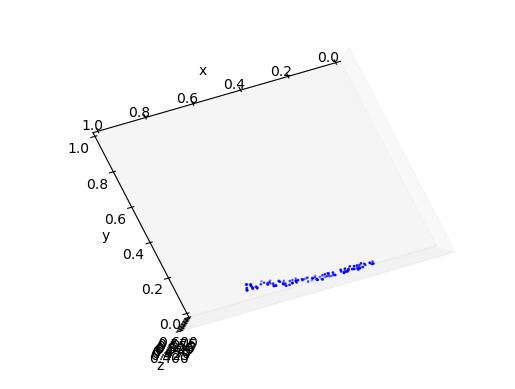

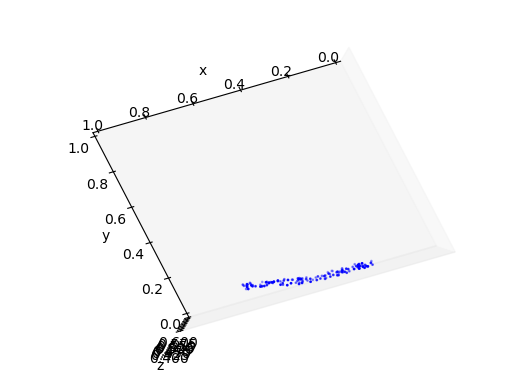

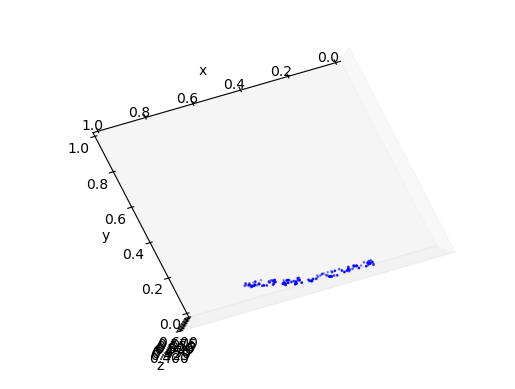

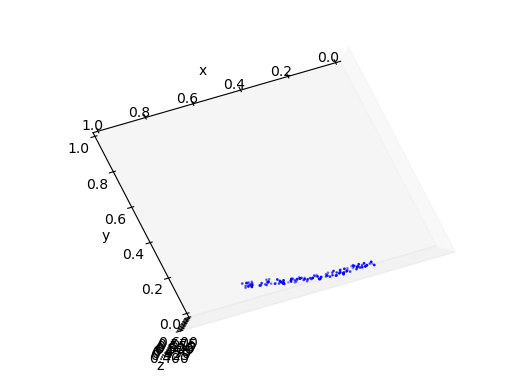

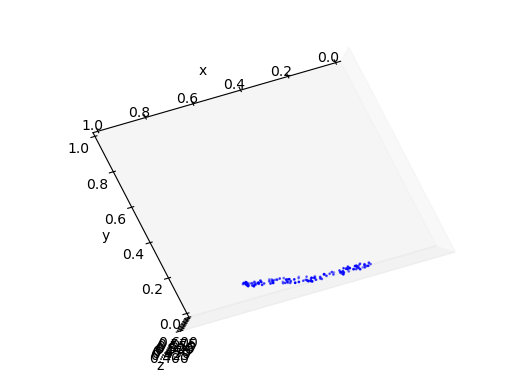

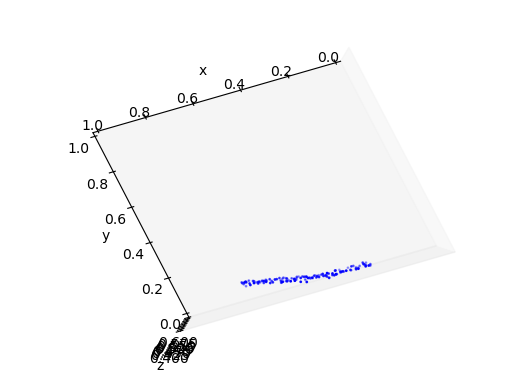

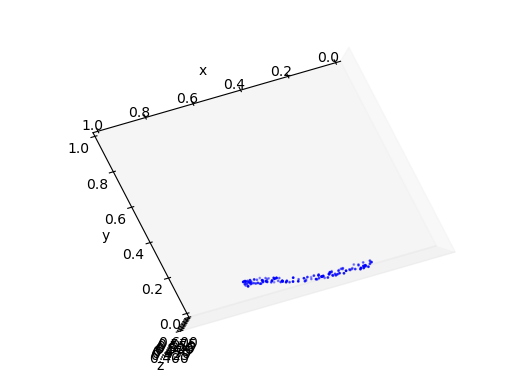

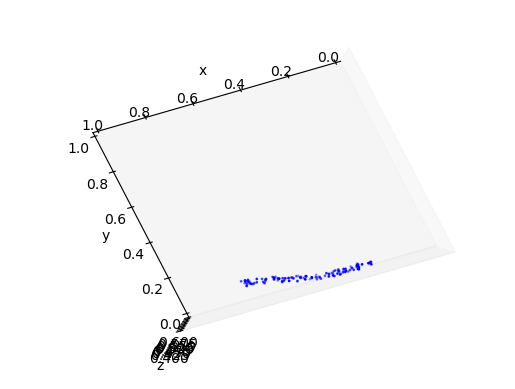

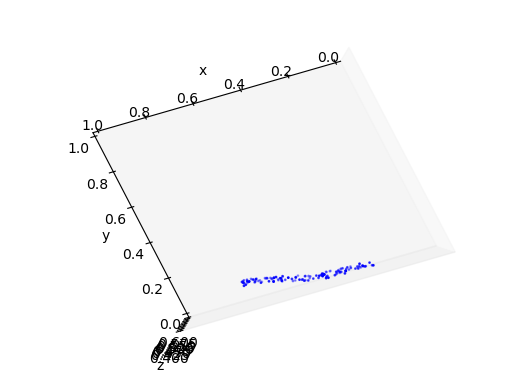

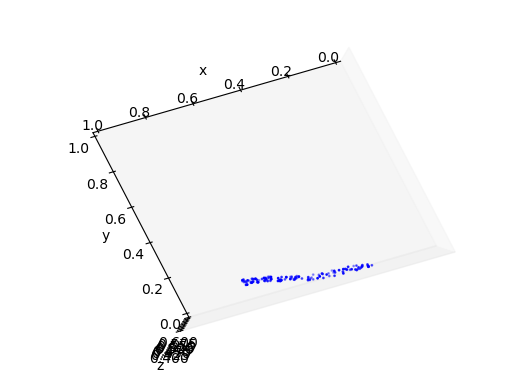

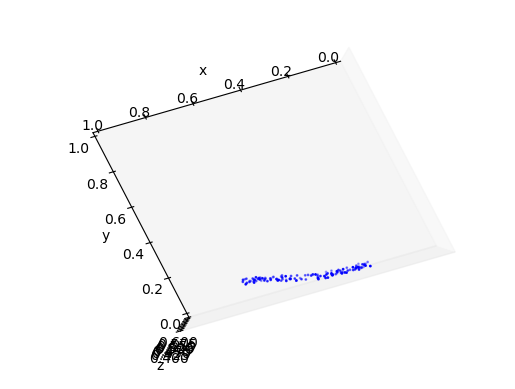

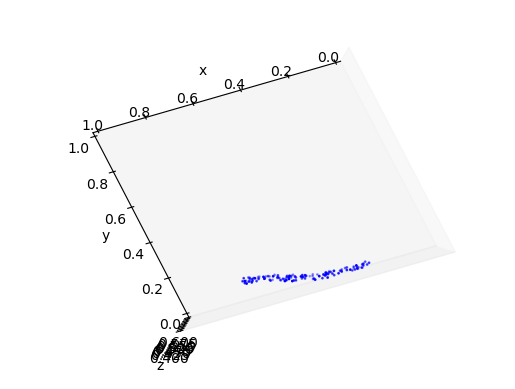

In [75]:
end_index = 30
step = 0

output_pcds = []
count = 0
for real, sim in zip(pcds[:end_index], pcds_sim[:end_index]):
    real = real[:, [0, 2, 1]]
    # size modify
    real = (real - np.mean(real, axis=0)) * 2 + np.mean(real, axis=0)
    # x modify
    real[:, 0] = 2 - real[:, 0]
    if step == 0:
        real_x_min = np.max(real[:, 0])
        sim_x_min = np.max(sim[:, 0])
        x_diff = real_x_min - sim_x_min
        real[:, 0] -= x_diff
    else:
        real[:, 0] -= x_diff
    # y modify
    if step == 0:
        real_y_min = np.min(real[:, 1])
        real[:, 1] -= real_y_min
    else:
        real[:, 1] -= real_y_min
    # z modify
    real[:, 2] += 0.5
    # cut
    real = real[real[:, 0] > 0.2]
    real = real[real[:, 0] < 0.8]
    real = real[real[:, 2] > 0.4]
    real = real[real[:, 2] < 0.6]
    output_pcds.append(real)

    # Generate an array of indices for the rows you want to sample
    indices = np.random.choice(sim.shape[0], 120, replace=False)
    # Use these indices to get the rows
    sim = sim[indices, :]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    # ax1.scatter(real[:, 0], real[:, 1], real[:, 2], s=1, c='red')
    ax1.scatter(sim[:, 0], sim[:, 1], sim[:, 2], s=1, c='blue')
    ax1.view_init(270, 110)
    # ax1.view_init(90, 270)

    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0.4, 0.6)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.grid(False)
    output_dir = '/root/LDOM/policy/scripts/demos/lift/sim'
    fig.savefig(f'{output_dir}/{count}_pcd.png')

    count += 1
output_pcds = np.array(output_pcds)

In [51]:
from PIL import Image
import glob
import re

def extract_number(filepath):
    # Extract the number part of the file name
    match = re.search(r'\d+', filepath)
    if match:
        return int(match.group(0))
    return filepath

# Get all png images
images_list = glob.glob(f'{output_dir}/*.png') # this gets all png files in the current directory
# Ensure the images are in the order you want them
images_list.sort(key=extract_number) 
# Create an image object for the first image in the list
img = Image.open(images_list[0])
# Create a list of image objects for the remaining images
img_list = [Image.open(img) for img in images_list[1:]]
print(len(img_list))
# save all images as a GIF
img.save(f'{output_dir}/output.gif', save_all=True, append_images=img_list, duration=20, loop=0)

149


In [52]:

from PIL import Image
import glob
import re

def extract_number(filepath):
    # Extract the number part of the file name
    match = re.search(r'\d+', filepath)
    if match:
        return int(match.group(0))
    return filepath

# Get all png images
images_list = glob.glob(f'{output_dir}/*.png') # this gets all png files in the current directory
# Ensure the images are in the order you want them
images_list.sort(key=extract_number) 
# Create an image object for the first image in the list
img = Image.open(images_list[0])
# Create a list of image objects for the remaining images
img_list = [Image.open(img) for img in images_list[1:]]
print(len(img_list))
# save all images as a GIF
img.save(f'{output_dir}/output.gif', save_all=True, append_images=img_list, duration=20, loop=0)

<re.Match object; span=(41, 43), match='42'>
<re.Match object; span=(41, 43), match='77'>
<re.Match object; span=(41, 43), match='43'>
<re.Match object; span=(41, 43), match='35'>
<re.Match object; span=(41, 43), match='97'>
<re.Match object; span=(41, 42), match='0'>
<re.Match object; span=(41, 42), match='8'>
<re.Match object; span=(41, 44), match='108'>
<re.Match object; span=(41, 43), match='65'>
<re.Match object; span=(41, 43), match='84'>
<re.Match object; span=(41, 43), match='33'>
<re.Match object; span=(41, 44), match='148'>
<re.Match object; span=(41, 44), match='138'>
<re.Match object; span=(41, 43), match='18'>
<re.Match object; span=(41, 44), match='124'>
<re.Match object; span=(41, 42), match='3'>
<re.Match object; span=(41, 43), match='66'>
<re.Match object; span=(41, 44), match='132'>
<re.Match object; span=(41, 43), match='80'>
<re.Match object; span=(41, 43), match='10'>
<re.Match object; span=(41, 44), match='105'>
<re.Match object; span=(41, 44), match='110'>
<re.Ma

In [18]:
output_pcds = np.array(output_pcds)
np.save(f'/root/real2sim/real2sim/real_points/{rope_type}/real_pcds_modify.npy', output_pcds)

In [ ]:
# cloth
end_index = 150
step = 0

output_pcds = []
for real, sim in zip(pcds[:end_index], pcds_sim[:end_index]):
    real = real[:, [0, 2, 1]]
    # size modify
    real = (real - np.mean(real, axis=0)) * 2 + np.mean(real, axis=0)
    # x modify
    real[:, 0] = 2 - real[:, 0]
    if step == 0:
        real_x_min = np.max(real[:, 0])
        sim_x_min = np.max(sim[:, 0])
        x_diff = real_x_min - sim_x_min
        real[:, 0] -= x_diff
    else:
        real[:, 0] -= x_diff
    # y modify
    if step == 0:
        real_y_min = np.min(real[:, 1])
        real[:, 1] -= real_y_min
    else:
        real[:, 1] -= real_y_min
    # z modify
    real[:, 2] += 0.5
    # cut
    real = real[real[:, 0] > 0.2]
    real = real[real[:, 0] < 0.8]
    real = real[real[:, 2] > 0.4]
    real = real[real[:, 2] < 0.6]
    output_pcds.append(real)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.scatter(real[:, 0], real[:, 1], real[:, 2], s=1)
    # ax1.scatter(sim[:, 0], sim[:, 1], sim[:, 2], s=1)
    ax1.view_init(90, 270)

    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0.4, 0.6)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
output_pcds = np.array(output_pcds)

In [ ]:
#grids

In [50]:
rope_type = 'red'
pcds = np.load(f'/root/real2sim/real2sim/real_points/red/real_densities.npy', allow_pickle=True)

In [52]:
pcds.shape

(150, 64, 64, 64)